In [34]:
import numpy as np
import matplotlib.pyplot as plt

class Kmeans:
    def __init__(self, k  = 3, max_iters = 1000, plot_steps = False):
        self.k = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        
        self.clusters = [[] for _ in range(0, self.k)]
        self.centers = []
    def predict(self, data):
        self.data = data
        self.n_samples, self.n_features = self.data.shape
        
        index_random_for_centers = np.random.choice(self.n_samples, self.k, replace = False)
        self.centers = [self.data[index] for index in index_random_for_centers]
        
        for _ in range(0, self.max_iters):
            self.clusters = self._get_clusters(self.centers)
            old_centers = self.centers
            self.centers = self._create_new_center(self.clusters) 
            
            if self._check_New_Old_centers(self.centers, old_centers):
                break
        
        
        return self._get_labels(self.clusters)
    
    
    def _get_clusters(self, centers):
        cluster = [[] for _ in range(0, self.k)]
        for index, samples in enumerate(self.data):
            closest_center_index = self.get_closest_center_index(samples, centers)
            cluster[closest_center_index].append(index)
        return cluster
    
    
    def get_closest_center_index(self, point, centers):
        distance = [self._distance_calculation(point, center) for center in centers]
        closest_center_index = distance.index(min(distance))
        return closest_center_index
    
    def _distance_calculation(self, x1, x2):
        return np.sqrt(np.sum((x1- x2) ** 2))
            
    def _create_new_center(self, clusters):
        centers = np.zeros((self.k, self.n_features))
        for index , cluster in enumerate(clusters):
            cluster_mean = np.mean(self.data[cluster], axis = 0)
            centers[index] = cluster_mean
        return centers
    def _check_New_Old_centers(self, new_centers, old_centers):
        distance = [
            self._distance_calculation(new_centers[index], old_centers[index]) for index in range(0, self.k)
        ]
        return np.sum(distance) == 0
            
    
    def _get_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for index , cluster in enumerate(clusters):
            for samples_index in cluster:
                labels[samples_index] = index
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.data[index].T
            ax.scatter(*point)

        for point in self.centers:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()   

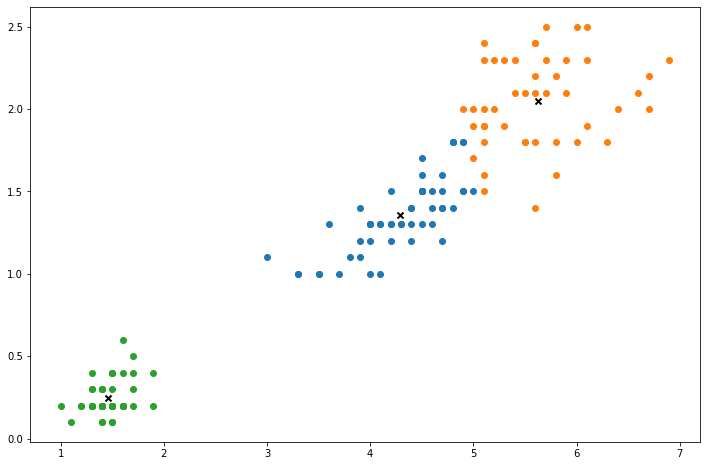

In [36]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X, y = iris.data, iris.target
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = np.array(iris_df[["petal length (cm)", "petal width (cm)"]])
model = Kmeans(k= len(np.unique(y)), max_iters=150, plot_steps=True)
y_pred = model.predict(X)
model.plot()